# ロジスティック回帰とは 
ロジスティック回帰 は線形分離可能なデータの境界線を学習によって見つけてデータの分類を行なう手法。
特徴としては境界線が直線になること。そのため、二項分類などクラスの少ないデータに用いられる。 また、データがクラスに分類される確率も計算することが可す。これらの特徴から主に「天気予報の降水確率」など、分類される確率を知りたい時に用いられる。


# 交差エントロピー関数とは  
情報の最小単位を1bitとして、情報量は確率の関数として,f(p)とあらわせるとする。
独立な事象１と２が起きた時の確率Pは、それぞれ
P = P1* P2であらわせる。
この時の情報量は
f(P)=f(P1)*f(P2)とすると、左辺の単位はビット、右辺の単位は（ビット）^2となって一致しなくなる。
そこで
f(P) = f(P1)+f(P2)となると単位が一致する。
つまり、事象１と事象２が起きた時の情報量は事象１が起きたという情報と、事象２が起きたという情報の和であらわせるべきということ。
つまり、f(P₁* P₂)＝f(P₁)＋f(P₂）という性質を持つことになる。
これは、log(P₁×P₂)=log(P₁)＋log(P₂）という対数関数の性質である。
f (p) = log(p)と表したいが、これだとpが小さくなるとf(p)が小さくねったしまう。
確率が小さい事象が起きた時の情報量が大きいと考える方が自然なので
f(p)＝-log(p)とマイナスをつける。情報エントロピーは何かデータを得た時の驚き具合と表現される。
これが自己情報量とあらわせる。
通常のエントロピーとはp×log(p)のようにlogの中身と外側に同じ変数が使われているのが普通のエントロピーである。
それに対して、交差エントロピーとは、t×log(y)のようにlogの中身と外側に異なる変数が使われているものである。
交差エントロピーとは、情報量の期待値であり、確率*実現値で定義できる。

つまり、
$ { \displaystyle
\begin{eqnarray*}
交差エントロピー&=&期待値 \\
 &=&\sum_{x} 確率 * 実現値 \\
 &=&\sum_{x} 確率 * 情報量 \\
 &=&\sum_{x} p(x)*(-\log q(x)) \\
 &=&-\sum_{x} p(x)\log q(x)
\end{eqnarray*}
}
$
２値分類の誤差関数は、$ {\log L = -\sum_{i=1}^N \left(y^{(i)}\log f_\theta(x^{(i)})+(1-y^{(i)})\log(1-f_\theta(x^{(i)}))\right) $

# シグモイド関数とは
$ \displaystyle f(x) = \frac{1}{1+\exp (-x)} $
以上の関数は 0 < f(x) < 1の範囲となる。
この関数に入力させることで、確率と同じような性質を与えることができる。
# 正則化とは  
学習をする際に、偏りすぎたデータにまで必要以上に対応してしまうと、過学習の状態に陥ることがある。
過学習の状態は、与えた学習データに対して、小さな誤差となるモデルが構築できている。ただし、ごく一部の例外的なデータに過度に対応したモデルとなっているために、構築した学習モデルを未知データに適用すると必ずしも適切な予測値を返さない状態となる。
学習データの中のごく一部の例外的なデータに過度に適用したモデルが構築されている状態ということで過学習という。
そのため、極端な重みのデータに対してペナルティを与える正則化が用いられる。正則化とは、モデルを学習する際に、複雑さが増すことに対するペナルティを設け、このペナルティを訓練誤差に加えた量がもっとも小さくなる学習モデルを求めるように汎化性能を高めようとするもの。
機械学習では、L1正則化とL2正則化が一般的に使用される。
L1正則化は、ペナルティとして、学習モデルのパラメーターの絶対値の総和に用いるもので、L2正則化は、ペナルティとして学習モデルのパラメータの２乗の総和を用いるもので、以下のような特徴を持つ。
- L1正則化　特定のデータの重みを0にする事で、不要なデータを削除する
- L2正則化　データの大きさに応じて0に近づけて、滑らかなモデルとする

# ロジスティック回帰では平均二乗誤差ではなく交差エントロピー誤差を使う理由  
凸最適化をするため。

In [109]:
#http://aidiary.hatenablog.com/entry/20140415/1397570262

In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [367]:
def sigmoid(X):
    y = 1.0 / (1.0 + np.exp(-X))
    return y      

def y_hat(X,theta):
    #y =  sigmoid(np.dot(theta,　X.T))
    #仮定関数は、シグモイド関数の引数にθxを入れたもの
    #theta= 4列
    #X = 100*4
    #(1*4 ) *(4*100)
    # 100
    y = sigmoid(np.dot(theta,X.T))
    return y

def compute_cost(X,y,theta,λ= 0.01):
    #numpy配列は計算が早いのでここで変換
    X = np.array(X)
    y = np.array(y)
    #第１項
    one_one = np.dot((-1 * y), np.log(y_hat(X,theta)))
    one_two = np.dot((1-y),np.log(1-  y_hat(X,theta)))
    one = 1/len(X)*(one_one- one_two)
    #第２項
    two = (λ/2*len(X))*sum(theta**2)
    return one+two


def  gradient_descent(X,y,theta):

        X = np.array(X)
        y = np.array(y)
        lr = 0.0001
       #訓練データの誤差
        past_costs = []
        #重み
        past_thetas = []
        #平均二乗和誤差を計算する
        loss = compute_cost(X,y,theta)
        #追加
        past_costs.append(loss)
        #追加
        past_thetas.append(theta)

        for i in range(5000):
            #仮定関数
            y_h=y_hat(X,theta)

            #パラメータの更新式
            theta = theta - lr *(1/len(y))*(X.T.dot(y_h-y))
            # 訓練データの誤差を計算する
            loss = compute_cost(X,y,theta)
            #訓練データの誤差を格納する
            past_costs.append(loss)
            past_thetas.append(theta)

        loss = past_costs
        theta = past_thetas

        return  past_thetas,past_costs
    
def predict_probs(X,theta):
    return  y_hat(X,past_thetas[-1])


def predict(X,theta,threshold=0.5):
    pred = y_hat(X,theta)
    for i in range(pred.size):
        if pred[i]>= 0.5:
            pred[i] = 1
        elif pred[i] < 0.5:
            pred[i] = 0
    return pred.astype('int')

def plot_loss_curve(past_costs):
    pd.DataFrame(past_costs).rename(columns={0:'Train'}).plot.line()
    plt.title('LossCurve')
    plt.show()

In [41]:
iris = pd.read_csv('../iris.csv')

In [42]:
index = (iris['Species'][iris['Species']=='Iris-versicolor'].index)
index = index.append( iris['Species'][iris['Species']=='Iris-virginica'].index)
iris = iris.iloc[index]

In [43]:
mapping = {'Iris-versicolor':0,'Iris-virginica':1}
iris.Species = iris.Species.map(mapping)

In [44]:
X = iris.drop(['Id','Species'],axis=1)

In [45]:
y = iris.Species
theta = np.random.rand(4)

In [47]:
 past_thetas,past_costs = gradient_descent(X,y,theta)

In [ ]:
def plot_loss_curve(past_costs):
    pd.DataFrame(past_costs).rename(columns={0:'Train'}).plot.line()
    plt.title('LossCurve')
    plt.show()

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


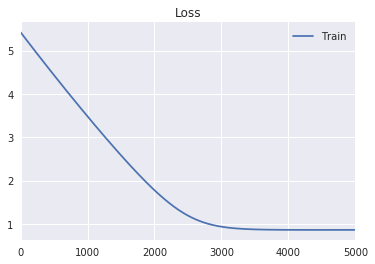

In [361]:
pd.DataFrame(past_costs).rename(columns={0:'Train'}).plot.line()
plt.title('Loss')
plt.show()

In [80]:
#正解率
def accuracy_rate(y, t):
    #データ型の確認の条件式
    return np.sum(y == t)/y.shape[0]

In [63]:
predict_probs(X,past_thetas[-1])

array([0.48262847, 0.53073288, 0.4961828 , 0.5030165 , 0.50339156,
       0.51532509, 0.55479786, 0.49936049, 0.47298556, 0.55586976,
       0.47121726, 0.54838482, 0.42630514, 0.51350789, 0.53299324,
       0.49530326, 0.5614785 , 0.46218295, 0.48777081, 0.47873499,
       0.59897184, 0.49845231, 0.49540412, 0.47762101, 0.4857745 ,
       0.49517348, 0.47091382, 0.53099346, 0.53553547, 0.46679988,
       0.47939906, 0.46495887, 0.49426306, 0.53536135, 0.57171949,
       0.5769745 , 0.50819839, 0.45822861, 0.53435488, 0.51369904,
       0.50058425, 0.51963906, 0.48812705, 0.48880622, 0.51757793,
       0.5131168 , 0.5230416 , 0.49619709, 0.51194099, 0.51850154,
       0.67455354, 0.59067594, 0.56379997, 0.55680759, 0.60969237,
       0.53247281, 0.60073366, 0.49935698, 0.51323621, 0.64613985,
       0.59598778, 0.55855112, 0.58221604, 0.60088975, 0.66680148,
       0.64259396, 0.55257055, 0.58373883, 0.53405782, 0.49421986,
       0.61530248, 0.62182983, 0.50054337, 0.55174722, 0.60120

In [345]:
pred = predict(X,past_thetas[-1])

In [346]:
pred 

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 各評価指標の算出

In [347]:
y[pred==y].index &y[pred==0].index

Int64Index([50, 52, 57, 58, 60, 62, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 79,
            80, 81, 82, 87, 92, 93, 97],
           dtype='int64')

In [274]:
#TruePositive
TP = len(y[pred==y].index &y[pred==0].index)

In [348]:
y[pred==y].index &y[pred==1].index

Int64Index([100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113,
            114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127,
            128, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142,
            143, 144, 145, 146, 147, 148, 149],
           dtype='int64')

In [275]:
#FalsePositive
TN = len(y[pred==y].index &y[pred==1].index)

In [349]:
y[pred!=y].index &y[pred==0].index

Int64Index([107, 119, 129, 134], dtype='int64')

In [276]:
FP = len(y[pred!=y].index &y[pred==0].index)

In [350]:
y[pred!=y].index &y[pred==1].index

Int64Index([51, 53, 54, 55, 56, 59, 61, 63, 64, 66, 70, 77, 78, 83, 84, 85, 86,
            88, 89, 90, 91, 94, 95, 96, 98, 99],
           dtype='int64')

In [277]:
FN = len(y[pred!=y].index &y[pred==1].index)

In [353]:
len(y)

100

# 指標の抜け漏れがないか確認

In [354]:
len(y) == TP+TN+FP+FN

True

# Acuraccy

In [280]:
def accuracy(y, pred):
    #TruePositive
    TP = len(y[pred==y].index &y[pred==0].index)
    #TrueNegative
    TN = len(y[pred==y].index &y[pred==1].index)
    #False Positive
    FP = len(y[pred!=y].index &y[pred==0].index)
    #Flase Negative
    FN = len(y[pred!=y].index &y[pred==1].index)
    
    accuracy = (TP + TN )/(TP+TN+FP+FN)
    return accuracy
    

# Recall

In [296]:
def recall(y, pred):
    TP = len(y[pred==y].index &y[pred==0].index)
    #TrueNegative
    TN = len(y[pred==y].index &y[pred==1].index)
    #False Positive
    FP = len(y[pred!=y].index &y[pred==0].index)
    #Flase Negative
    FN = len(y[pred!=y].index &y[pred==1].index)
    
    recall = TP /(TP+FN)
    return recall

In [297]:
recall(y,pred)

0.48

# Precision

In [320]:
def precision(y, pred):
    TP = len(y[pred==y].index &y[pred==0].index)
    #TrueNegative
    TN = len(y[pred==y].index &y[pred==1].index)
    #False Positive
    FP = len(y[pred!=y].index &y[pred==0].index)
    #Flase Negative
    FN = len(y[pred!=y].index &y[pred==1].index)
    precision = float(TP /(TP+FP ))
#     precison = TP /(TP+FP)
    return precision

In [321]:
precision(y, pred)

0.8571428571428571

# F-1

In [322]:
def f_1(y,pred):
    f_1 = (2*recall(y,pred)*precision(y,pred))/(recall(y,pred)*precision(y,pred))
    return f_1

# クラス化

In [337]:
class Metric():
    def __init__(self, y,pred):
        #教師データ
        self.y = y
        # 予測値
        self.pred = pred
        #TruePositive
        self.TP = len(y[pred==y].index &y[pred==0].index)
        #TrueNegative
        self.TN = len(y[pred==y].index &y[pred==1].index)
        #FalsePositive
        self.FP  = len(y[pred!=y].index &y[pred==0].index)
        #FalseNegative
        self.FN = len(y[pred!=y].index &y[pred==1].index)
        
    def accuracy(self):
        accuracy = (self.TP + self.TN )/(self.TP+self.TN+self.FP+self.FN)
        return accuracy
    
    def recall(self):
        recall = self.TP /(self.TP+self.FN)
        return recall
    
    def precision(self):
        precision = float(self.TP /(self.TP+self.FP ))
        return precision
    
    def f_1(self):
        f_1 = (2*self.recall()*self.precision())/(self.recall()*self.precision())
        return f_1

# 通るか確認

In [338]:
metric = Metric(y,pred)

In [339]:
metric.accuracy()

0.7

In [340]:
metric.recall()

0.48

In [341]:
metric.precision()

0.8571428571428571

In [342]:
metric.f_1()

2.0

In [368]:
import numpy as np
import pandas as pd
class ScratchLogisticRegression():
    """
    線形回帰
    ＊コンストラクタ（__init__）のパラメータはここに書いておくと分かりやすい

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
#     num_iter = 3000
#     lr= 0.01

    def __init__(self, num_iter, lr):
        #メソッド内で共有したい変数をおlく
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
#         self.bias = bias
#         self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        #predictで使う重み
        self.theta =  np.random.rand(4)

    def sigmoid(self,X):
        y = 1.0 / (1.0 + np.exp(-X))
        return y      

    def y_hat(self,X):
        #y =  sigmoid(np.dot(theta,　X.T))
        #仮定関数は、シグモイド関数の引数にθxを入れたもの
        #theta= 4列
        #X = 100*4
        #(1*4 ) *(4*100)
        # 100
        y = self.sigmoid(np.dot(self.theta,X.T))
        return y

    def compute_cost(self,X,y,λ= 0.01):
        X = np.array(X)
        y = np.array(y)
        # 第１項
        one_one = np.dot((-1 * y), np.log(self.y_hat(X)))
        one_two = np.dot((1-y),np.log(1-  self.y_hat(X)))
        one = 1/len(X)*(one_one- one_two)
        two = (λ/2*len(X))*sum(self.theta**2)
        return one+two

            
    def  gradient_descent(self,X,y):

            X = np.array(X)
            y = np.array(y)
            lr = 0.0001
           #訓練データの誤差
            past_costs = []
            #重み
            past_thetas = []
            #平均二乗和誤差を計算する
            loss = self.compute_cost(X,y)
            #追加
            past_costs.append(self.loss)
            #追加
            past_thetas.append(self.theta)

            for i in range(5000):
                #仮定関数
                y_h=self.y_hat(X)

                #パラメータの更新式
                self.theta = self.theta - lr *(1/len(y))*(X.T.dot(y_h-y))
                cost = (self.compute_cost(X,y))
                # 訓練データの誤差を計算する
                loss = self.compute_cost(X,y)
                #訓練データの誤差を格納する
                past_costs.append(loss)
                past_thetas.append(self.theta)

            self.loss = past_costs
            self.theta = past_thetas

            return  past_thetas,past_costs


    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        self.gradient_descent(X,y)
#         if self.verbose:
#             #verboseをTrueにした際は学習過程を出力
#             print()
        
        
    #返す値は他で使わないのでリターンで返す
    def predict_probs(self,X):
        return np.dot(self.theta[-1],X.T)


    def predict(self,X,threshold=0.5):
        pred = y_hat(X,theta)
        for i in range(pred.size):
            if pred[i]>= threshold:
                pred[i] = 1
            elif pred[i] < threshold:
                pred[i] = 0
        return pred.astype('int')
    
    def plot_loss_curve(self):
        pd.DataFrame(self.theta).rename(columns={0:'Train'}).plot.line()
        plt.title('LossCurve')
        plt.show()

# Pickleで重みを保存
機械学習の学習済みモデルを回す方法。

